# Airbnb: Boston EDA
This notebook is a part of Udacity Data Science Nanodegree projects. Also as a recap of Introduction to Data Science Course.
## CRISP-DM
CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model with six phases that naturally describes the data science life cycle.
## 1. Business Understanding
Let's say you are an analyst for a housing company that want to invest their money to build a housing in Boston Area and make a listing in Airbnb. How can you make a recommendation to your higher-ups as an analyst? 

Thus, these were three important questions I decided to explore in this dataset, to help me come up with some answers for my boss:
 1. Which neighborhood would make the most profit?
 2. What are the most profitable criteria of housing based on the trend?
 3. How does our profit would change throughout the year and how it will impact specific neighborhood or housing?
 
## 2. Data Understanding
Let's just do an exploratory data analysis to get to know our dataset what are included in it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
sns.color_palette(as_cmap=True)
sns.set()

### Listings

In [3]:
df_boston_listings = pd.read_csv('data-boston-airbnb/listings.csv')
df_boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
df_boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### Calendar

In [5]:
df_boston_calendar = pd.read_csv('data-boston-airbnb/calendar.csv')

In [6]:
df_boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


# 3. Data Cleaning and Preparation

In [258]:
columns = ['id','name','host_id','host_name','neighbourhood_cleansed','property_type','room_type','beds','bed_type','price','weekly_price','monthly_price']

In [8]:
# Remove the dollar sign ($) and comma (,) in the 'price' column, then change the data type to integer
df_boston_listings.price = df_boston_listings.price.apply(lambda x: x[1:-3]).str.replace(',','').astype(int)
df_boston_calendar.loc[df_boston_calendar.available != 'f','price'] = df_boston_calendar.loc[df_boston_calendar.available != 'f','price'].apply(lambda x: x[1:-3]).str.replace(',','').astype(int)

In [9]:
# Change the 'date' column datatype to datetime
df_boston_calendar.date = pd.to_datetime(df_boston_calendar.date)

In [10]:
print('First: ', df_boston_calendar.date.min())
print('Last: ', df_boston_calendar.date.max())

First:  2016-09-06 00:00:00
Last:  2017-09-05 00:00:00


In [14]:
df_boston_calendar.sort_values('date', ascending=True)

,listing_id,date,available,price
654444,8814039,2016-09-06,t,366
440919,14489201,2016-09-06,f,NaN
440554,1214214,2016-09-06,f,NaN
440189,7620413,2016-09-06,f,NaN
439824,4278067,2016-09-06,t,75
...,...,...,...,...
1218735,14253149,2017-09-05,t,79
425513,8096900,2017-09-05,f,NaN
734628,10945774,2017-09-05,t,129
1048645,14740708,2017-09-05,f,NaN


In [15]:
df_boston_calendar.loc[df_boston_calendar.available != 'f', 'price']

365        65
366        65
367        65
368        75
369        75
           ..
1308875    62
1308876    62
1308877    62
1308878    62
1308879    62
Name: price, Length: 643037, dtype: object

## Merge Listings Data and Calendar Data

In [128]:
new_df = df_boston_calendar.merge(df_boston_listings, how='left', left_on='listing_id', right_on='id')

In [129]:
new_df['new_date'] = new_df.date.dt.to_period('M')

In [130]:
property_type = ['Apartment','House','Condominium','Others']

In [131]:
new_df.property_type = new_df.property_type.apply(lambda x: 'Others' if (x not in property_type) else x)

# 1. Neighbourhood with Most Profit

## Data Prep

In [11]:
property_type = ['Apartment','House','Condominium','Others']
df_boston_listings.property_type = df_boston_listings.property_type.apply(lambda x: 'Others' if (x not in property_type) else x)

In [12]:
df_boston_listings = df_boston_listings[df_boston_listings['price'] <= 500]

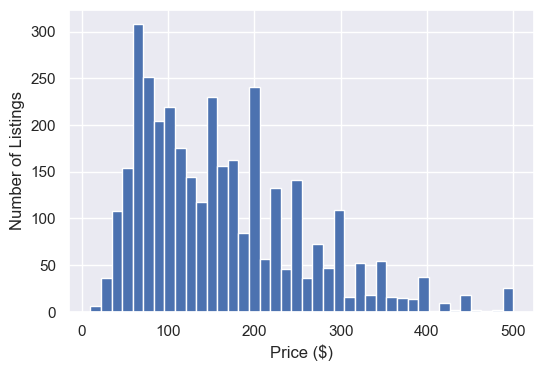

In [13]:
check_price = pd.read_csv('data-boston-airbnb/listings.csv')
check_price.price = check_price.price.apply(lambda x: x[1:-3]).str.replace(',','').astype(int)

plt.hist(check_price[check_price['price'] <= 500]['price'],histtype ='bar',bins=40);

plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

plt.gcf().set_size_inches(6,4)
plt.gcf().set_dpi(100)
plt.show()

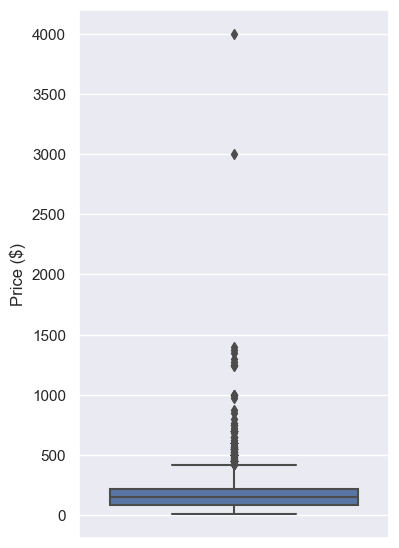

In [14]:
sns.boxplot(data=check_price, y='price');
plt.ylabel('Price ($)', fontsize=12)

plt.gcf().set_size_inches(4,7)
plt.gcf().set_dpi(100)
plt.show()

## Explore

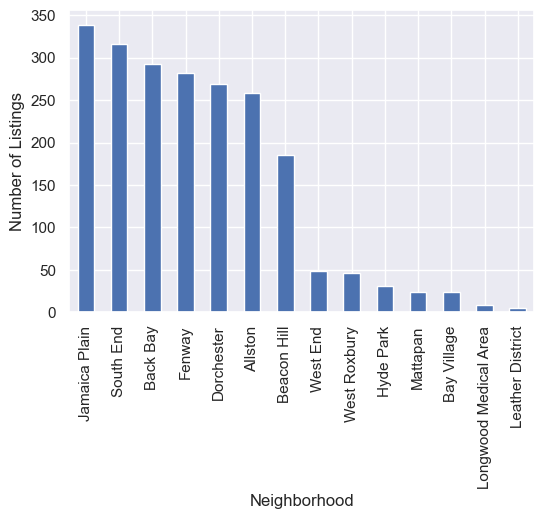

In [15]:
# Neighbourhood with Most Listings
top = df_boston_listings.neighbourhood_cleansed.value_counts().sort_values(ascending=False)[:7]
bottom = df_boston_listings.neighbourhood_cleansed.value_counts().sort_values(ascending=False)[-7:]
top.append(bottom).plot(kind='bar');

# plt.title('Neighborhood with Highest and Lowest Number of Listings', loc='center', pad=10, fontsize=15)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

plt.gcf().set_size_inches(6,4)
plt.gcf().set_dpi(100)
plt.show()

In [16]:
df_boston_listings.groupby('neighbourhood_cleansed')['property_type'].value_counts().sort_values(ascending=False)[:10]

neighbourhood_cleansed  property_type
Fenway                  Apartment        269
Back Bay                Apartment        264
South End               Apartment        261
Jamaica Plain           Apartment        190
Allston                 Apartment        176
Beacon Hill             Apartment        169
Dorchester              Apartment        161
Downtown                Apartment        145
Brighton                Apartment        120
North End               Apartment        119
Name: property_type, dtype: int64

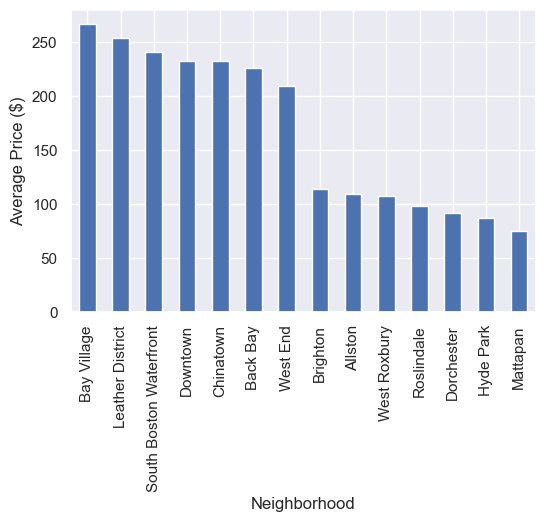

In [17]:
top = df_boston_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)[:7]
bottom = df_boston_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)[-7:]
top.append(bottom).plot(kind='bar');

# plt.title('Neighborhood with Highest and Lowest Average Price', loc='center', pad=10, fontsize=15)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

plt.gcf().set_size_inches(6,4)
plt.gcf().set_dpi(100)
plt.show()

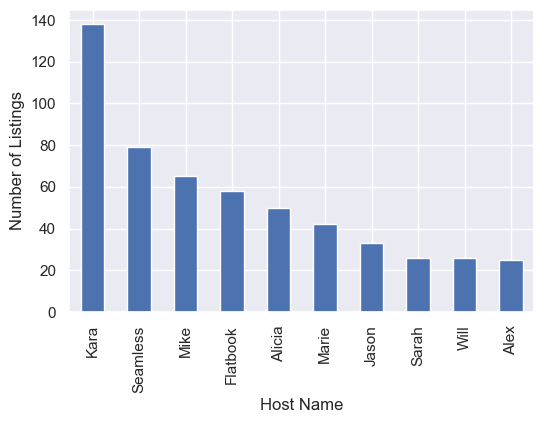

In [22]:
df_boston_listings['host_name'].value_counts()[:10].plot(kind='bar');

plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

plt.gcf().set_size_inches(6,4)
plt.gcf().set_dpi(100)
plt.show()

In [209]:
new_df.groupby(['new_date','neighbourhood'])['price_x'].mean()

new_date  neighbourhood   
2016-09   Allston-Brighton    149.180957
          Back Bay            343.617772
          Beacon Hill         244.346975
          Brookline           204.487179
          Cambridge           211.877193
                                 ...    
2017-09   South Boston        243.468000
          South End           255.934605
          Theater District    180.388235
          West End            232.336683
          West Roxbury        130.360000
Name: price_x, Length: 390, dtype: float64

In [33]:
new_df.groupby('new_date')['price_x'].sum()

new_date
2016-09     6165579
2016-10    10817676
2016-11    11949813
2016-12    11748139
2017-01    11549466
2017-02    10280396
2017-03    10032940
2017-04    10135248
2017-05    10382979
2017-06    10363503
2017-07    11129255
2017-08    11297226
2017-09     1751341
Freq: M, Name: price_x, dtype: object

# 2. Property Criterias

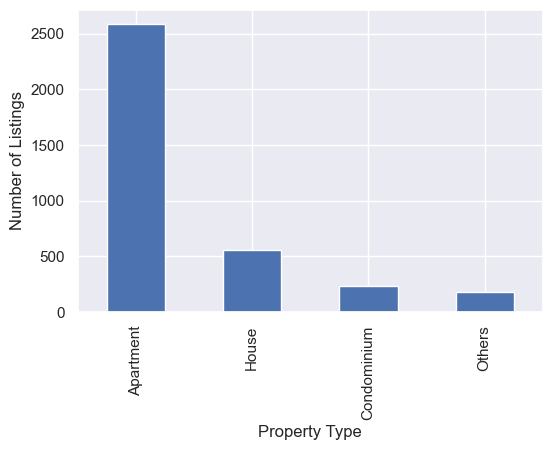

In [171]:
df_boston_listings.property_type.value_counts().plot(kind='bar');

plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

plt.gcf().set_size_inches(6,4)
plt.gcf().set_dpi(100)
plt.show()

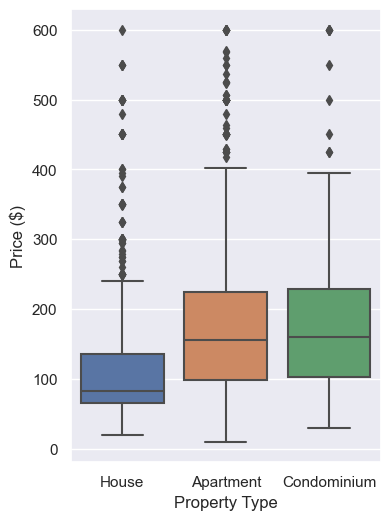

In [166]:
# df_boston_listings.groupby('property_type').boxplot(column='price', subplot=False);

df_property = df_boston_listings[df_boston_listings.property_type != 'Others']
sns.boxplot(data=df_property, x='property_type', y='price')

plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

plt.gcf().set_size_inches(4,6)
plt.gcf().set_dpi(100)
plt.show()

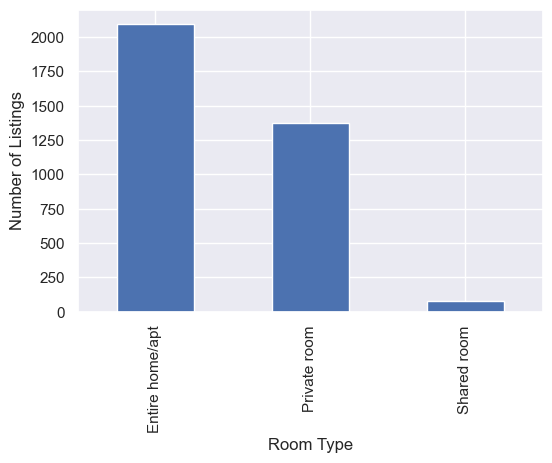

In [170]:
df_boston_listings.room_type.value_counts().plot(kind='bar');

plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

plt.gcf().set_size_inches(6,4)
plt.gcf().set_dpi(100)
plt.show()

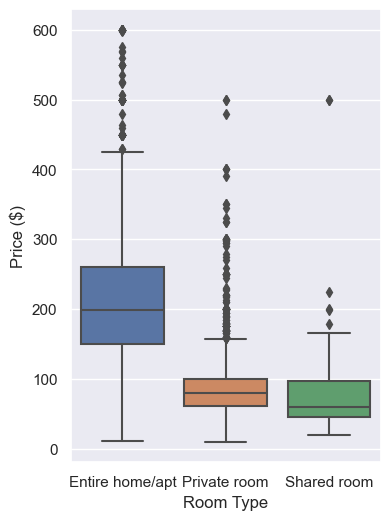

In [167]:
sns.boxplot(data=df_boston_listings, x='room_type', y='price');

plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

plt.gcf().set_size_inches(4,6)
plt.gcf().set_dpi(100)
plt.show()

# Calendar

In [23]:
df_boston_calendar.loc[:,'new_date'] = df_boston_calendar.date.dt.to_period('M')

In [24]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   object        
 4   new_date    1308890 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(2), period[M](1)
memory usage: 49.9+ MB


In [25]:
df_boston_calendar

,listing_id,date,available,price,new_date
0,12147973,2017-09-05,f,NaN,2017-09
1,12147973,2017-09-04,f,NaN,2017-09
2,12147973,2017-09-03,f,NaN,2017-09
3,12147973,2017-09-02,f,NaN,2017-09
4,12147973,2017-09-01,f,NaN,2017-09
...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,2016-09
1308886,14504422,2016-09-09,f,NaN,2016-09
1308887,14504422,2016-09-08,f,NaN,2016-09
1308888,14504422,2016-09-07,f,NaN,2016-09


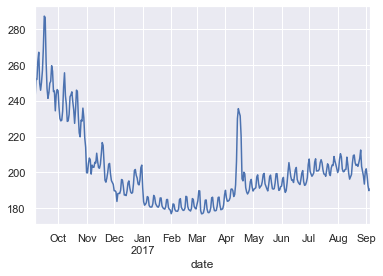

In [29]:
df_boston_calendar.groupby('date')['price'].mean().plot();